# Problem statement:
Social Network Qwerty deals with a lot of data pertaining to user chats, comments and feedback over several platforms and forums. One of the aims for the company is to separate out users who give constructive comments from those who spam. There are several types of spam, some of which are hate speech, obscenity and insults.

Qwerty wants to use Deep Learning technique to separate out spam feedback and concentrate only on the constructive ones to improve customer satisfaction as well as brand value of the company.

Use the attached data-set to develop a deep learning model to help Qwerty achieve its objectives, stating 
1. architecture, 
2. loss function and 
3. performance metric you decide to choose and your reasons for choosing them

## Key Points:
* There are several types of spam, some of which are hate speech, obscenity and insults.
* Separate out users who give constructive comments from those who spam.
* Concentrate only on the constructive ones to improve customer satisfaction as well as brand value of the company.

In [1]:
import os
os.chdir('/Users/naga/GitHub/competitions/bottomline_nlp_usecase/')

In [165]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth=1024
df = pd.read_csv('data/raw/NLPCaseStudy.csv')
df.text = df.text.str.lower()
df.head(10)

,id,text,hate_speech,obscene,insulting
0,0,"""\n\nwikipedia an interesting yet frustrating thing. you get pseudo-intellectuals who have no idea about the rm show yet think their """"wise"""" guesswork is better than facts from one who watches. imagine a world run by people who haven't got a clue yet force their views & values on others in the deluded idea """"they"""" are right. the world's finances would be fucked up, entertainment would be more documentaries & real-life than comedy, music would be bland & crass (etc etc). oops it actually is... the incompetent & inept with old money = the shit we are in today. ha ha ha... oh.""",1,0,0
1,1,"""\n\nthanks\nthanks for reverting the vandalism on my talk page. ''' 24/7''' (c) """,0,0,0
2,2,"(utc)\n\nand fundamental christains are not as vehement? go f*** yourself. 16:48, 27 march 2007",1,1,1
3,3,"why don't you go fuck your mom 05:52, 26 jun 2005 (utc)",1,1,0
4,4,"not to mention, he's a nobody. he's his biggest fan - just look at his wikipedia page history.",0,0,0
5,5,'prounonced fee-on'? eh?86.0.203.120,0,0,0
6,6,"it probably couldn't hurt to start a discussion. i wouldn't see this as a big deal, except that the template doesn't do the best job of explaining what its classification of the article means. as far as i can see, the template refers only to the position of the article link on the wp:ga page, and this is not a formal declaration of exactly where the article fits within the organization of all human knowledge. however, we might as well try to put the peak oil article link in the ga page location that makes the most sense.",0,0,0
7,7,ou leftist wikipedia scum are an insignificant fringe group that will soon be exterminated.,1,0,0
8,8,""":i wouldn't worry suit. it seems that whedonette will get what's comming to him.. 3:16 \n\n""",0,0,0
9,9,monica lewinsky article \n\nexcuse me? you didn't even give a warning or anything. i clarified the reasons for my edit change in the discussion section. please do not give out erroneous warnings for things that do not line up with your view-point. be neutral first and foremost. i did not do anything warranting a vandalism warning. please refrain from this in the future.,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31634 entries, 0 to 31633
Data columns (total 5 columns):
id             31634 non-null int64
text           31634 non-null object
hate_speech    31634 non-null int64
obscene        31634 non-null int64
insulting      31634 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


## Data Exploration:

* Total data points :: 31634
* Constructive Comments :: 15788
* Spam Comments :: 15846

In [166]:
x=df.iloc[:,2:].sum()
rowsums=df.iloc[:,2:].sum(axis=1)
df['constructive']=(rowsums==0)
df['constructive'].sum()
print("Total comments = ",len(df))
print("Total constructive comments = ",df['constructive'].sum())
print("Total tags =",x.sum())

Total comments =  31634
Total constructive comments =  15788
Total tags = 31317


In [167]:
print("Check for missing values in dataset")
null_check=df.isnull().sum()
print(null_check)

Check for missing values in dataset
id              0
text            0
hate_speech     0
obscene         0
insulting       0
constructive    0
dtype: int64


## Distribution of Labels

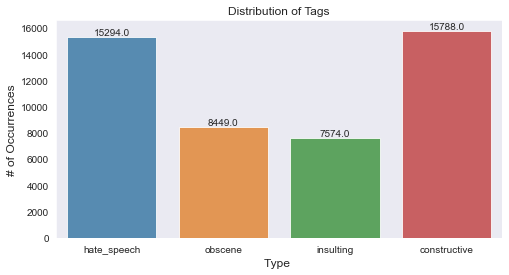

In [168]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

x=df.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of Tags")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Comments with Multiple Tags

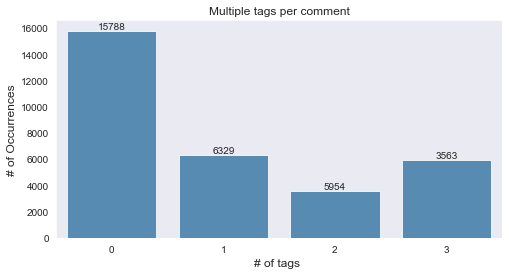

In [169]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[0])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

## Correlation Among Tags

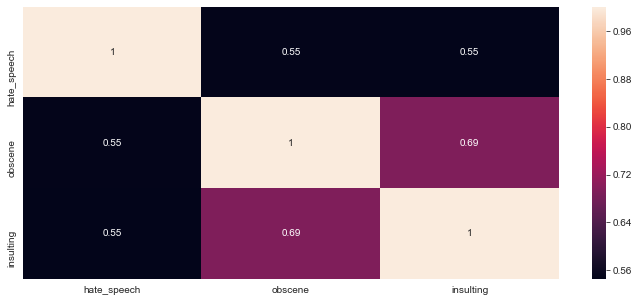

In [170]:
temp_df=df.iloc[:,2:-1]
corr=temp_df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [16]:
df.head(1)

,id,text,hate_speech,obscene,insulting,constructive
0,0,"""\n\nwikipedia an interesting yet frustrating thing. you get pseudo-intellectuals who have no idea about the rm show yet think their """"wise"""" guesswork is better than facts from one who watches. imagine a world run by people who haven't got a clue yet force their views & values on others in the deluded idea """"they"""" are right. the world's finances would be fucked up, entertainment would be more documentaries & real-life than comedy, music would be bland & crass (etc etc). oops it actually is... the incompetent & inept with old money = the shit we are in today. ha ha ha... oh.""",1,0,0,False


In [171]:
from collections import Counter
docs = df.text.tolist()
docs = [doc.lower().replace('\n',' ') for doc in docs]
unique_words = set([word for doc in docs for word in doc.split() if len(word)>1 and word not in STOPWORDS])

In [172]:
len(unique_words)

130041

## How many unique words are there in the corpus?
* There are 130041 unique words in the corpus, it includes:
    * misspelled words
    * unsegemented words
    * words with repeating chars
    * Acronyms
    * URLs
    * IP addresses
    * User names
    * Date Time
    * Time Zone

## Are there any words with repeating characters?

* There are words with repeating characters
* Example:
    * 'yooooooooooooooooooooooooooooooouuuuuuuuuuuuuuuuuuuu',
    * 'blaaaaaaaaaaaaaaaaah.',

## Are there any comments with repeating words?

* There are comments with repeating words
Example:

    * stupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centraliststupid spanish centralist'

## Are there any beep/incomplete words?

* There are 537 beep/incomplete words present in the corpus.
* Example:
    * b****
    * A*
    * A**hole
    * f**
    * a***-retentiv
    * B****
    * bull****
    * )*****(
    * f**ckin
    * mother****er
    * motherf**ker
    * pr***

## Are there any URLs?

* There are 1055 URLs present in the corpus
* Example:
    * http://www.pages.drexel.edu/~asr37/Main.html
    * http://en.wikipedia.org/wiki/Wikipedia:Administrators%27_noticeboard/Incidents
    * http://www.lastwordonnothing.com/2013/01/17/5266/
    * http://www.spokanemasonictemple.org/History/History.htm
    * http://www.sciviews.org/benchmark

## Are there any IP Addresses?

* There are more the 2000 IP addresses present in the corpus
* Example: 
    * 142.204.42.81
    * 71.102.18.173
    * 199.216.216.1,
    * 86.83.155.44
    * 4.188.98.84
    * 117.201.43.1

## Are there any user names?

* There are ~55 user names present in the corpus.
* Example:
    * @Vin09
    * @$$hol
    * @Ganesh
    * @S
    * @n@
    * @Gligan
    * @POD
    * @Qwyrxia
    * @Bwilkin
    * @SPECIFICO

## Are there any Date Time and Time Zone info?

* There are comments with date time and time zone info
* Example:
    * 2006-January-27
    * 06-Feb-2005
    * 07-May-2010
    * 13:40 UTC

## Frequent Words in each Category

In [188]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src.data.constants import STOPWORDS
stopword=set(STOPWORDS)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


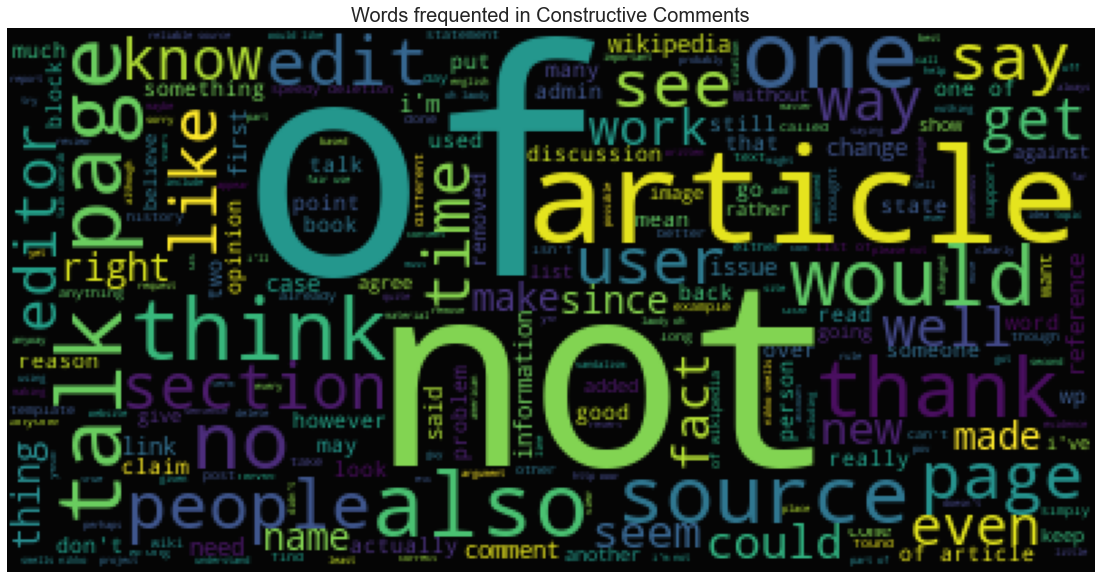

In [173]:
subset=df[df.constructive==True]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Constructive Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

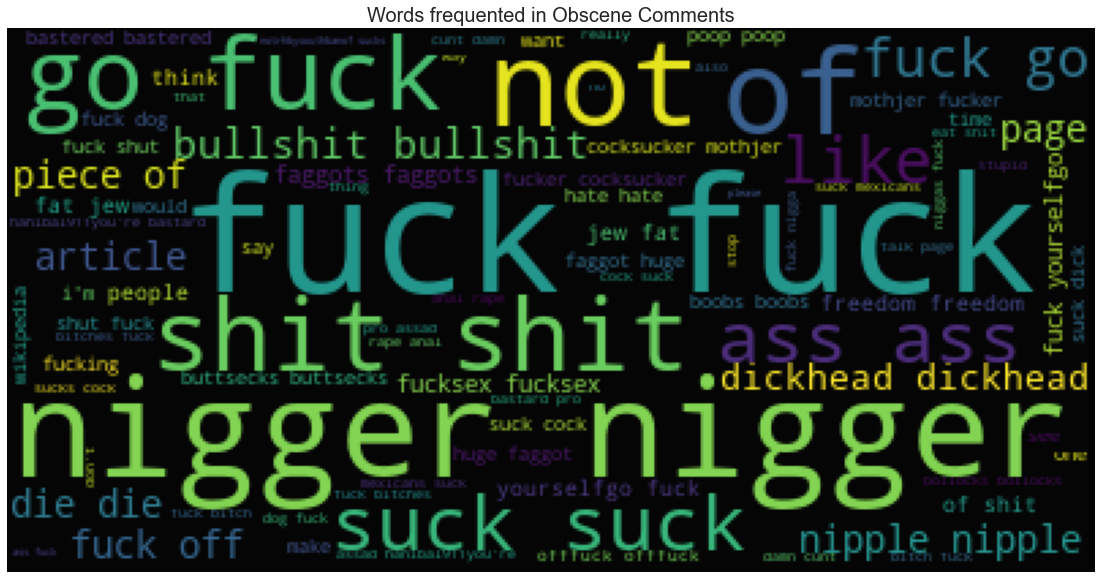

In [174]:
subset=df[df.obscene==True]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Obscene Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

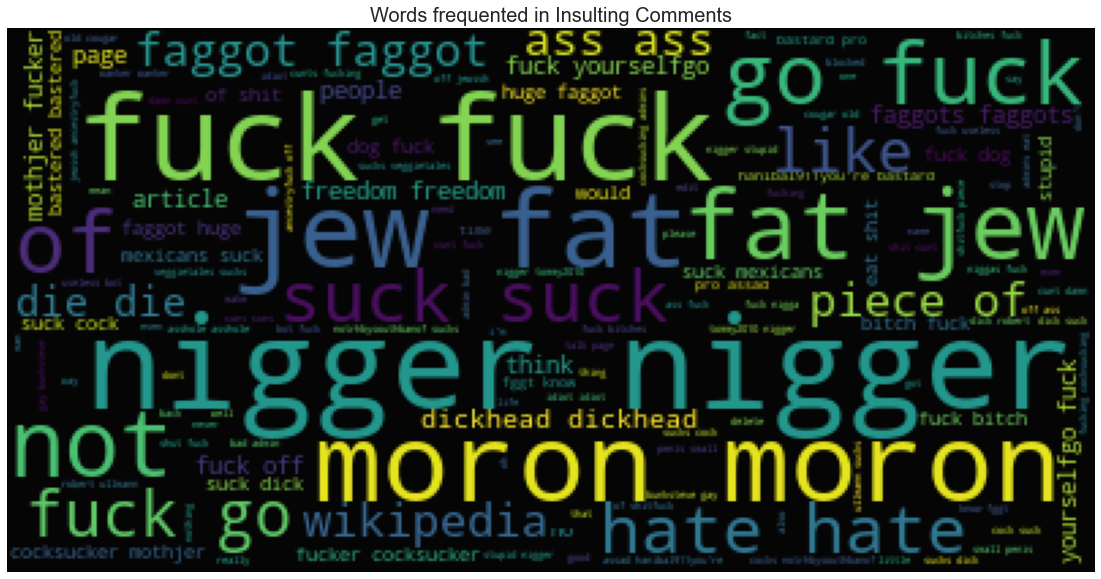

In [175]:
subset=df[df.insulting==True]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.title("Words frequented in Insulting Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

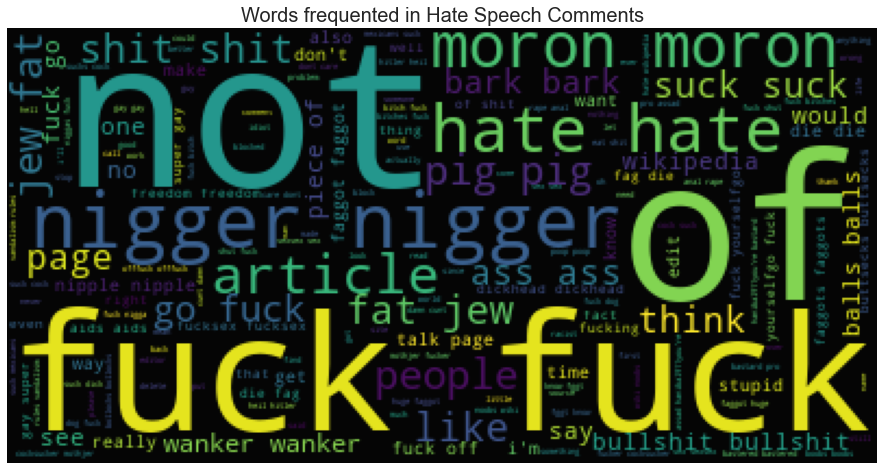

In [176]:
subset=df[df.hate_speech==True]
text=subset.text.values
wc= WordCloud(background_color="black",max_words=2000,stopwords=stopword)
wc.generate(" ".join(text))
plt.figure(figsize=(20,8))
plt.axis("off")
plt.title("Words frequented in Hate Speech Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

## Insights
> * From the above word clouds it's clear that 
>     * #### Constructive comments do not have vulguar words.
>     * #### **The frequency of vulgar words in the hate_speech, obscene, insulting comments is very high**

In [177]:
df.text = df.text.str.strip()
df['no_of_chars'] = df.text.apply(lambda x: len(x))
df['no_of_words'] = df.text.str.split().apply(len)
df['no_of_unique_words'] = df.text.apply(lambda x: len(set(x.split())))
df['no_of_beep_words'] = df.text.apply(lambda x: len([word for word in x.split() if word.find('**')>-1]))

In [178]:
df.head(2)

,id,text,hate_speech,obscene,insulting,constructive,no_of_chars,no_of_words,no_of_unique_words,no_of_beep_words
0,0,"""\n\nwikipedia an interesting yet frustrating thing. you get pseudo-intellectuals who have no idea about the rm show yet think their """"wise"""" guesswork is better than facts from one who watches. imagine a world run by people who haven't got a clue yet force their views & values on others in the deluded idea """"they"""" are right. the world's finances would be fucked up, entertainment would be more documentaries & real-life than comedy, music would be bland & crass (etc etc). oops it actually is... the incompetent & inept with old money = the shit we are in today. ha ha ha... oh.""",1,0,0,False,581,103,81,0
1,1,"""\n\nthanks\nthanks for reverting the vandalism on my talk page. ''' 24/7''' (c) """,0,0,0,True,79,15,13,0


In [179]:
print(df[(df.hate_speech==0) & (df.obscene==0) & (df.insulting==0)][['no_of_beep_words']].sum())
df[(df.hate_speech==0) & (df.obscene==0) & (df.insulting==0)][['no_of_chars','no_of_words','no_of_unique_words','no_of_beep_words']].describe().T

no_of_beep_words    15
dtype: int64


,count,mean,std,min,25%,50%,75%,max
no_of_chars,15788.0,398.035850,570.188969,6.0,103.0,216.0,451.0,4994.0
no_of_words,15788.0,67.781670,95.064083,1.0,18.0,37.0,77.0,993.0
no_of_unique_words,15788.0,48.019445,52.189013,1.0,16.0,32.0,60.0,486.0
no_of_beep_words,15788.0,0.000950,0.034679,0.0,0.0,0.0,0.0,2.0


In [180]:
print(df[df.hate_speech==1][['no_of_beep_words']].sum())
df[df.hate_speech==1][['no_of_chars','no_of_words','no_of_unique_words','no_of_beep_words']].describe().T

no_of_beep_words    253
dtype: int64


,count,mean,std,min,25%,50%,75%,max
no_of_chars,15294.0,294.215117,615.277106,6.0,59.0,123.0,270.0,5000.0
no_of_words,15294.0,51.161501,106.301783,1.0,11.0,22.0,48.0,1411.0
no_of_unique_words,15294.0,31.087093,37.703495,1.0,10.0,19.0,38.0,463.0
no_of_beep_words,15294.0,0.016542,0.207556,0.0,0.0,0.0,0.0,8.0


In [181]:
print(df[df.obscene==1][['no_of_beep_words']].sum())
df[df.obscene==1][['no_of_chars','no_of_words','no_of_unique_words','no_of_beep_words']].describe().T

no_of_beep_words    161
dtype: int64


,count,mean,std,min,25%,50%,75%,max
no_of_chars,8449.0,285.725175,639.037702,6.0,53.0,110.0,246.0,5000.0
no_of_words,8449.0,49.470352,108.614132,1.0,10.0,20.0,44.0,1403.0
no_of_unique_words,8449.0,28.674991,35.936038,1.0,9.0,17.0,35.0,463.0
no_of_beep_words,8449.0,0.019056,0.230266,0.0,0.0,0.0,0.0,8.0


In [182]:
print(df[df.insulting==1][['no_of_beep_words']].sum())
df[df.insulting==1][['no_of_chars','no_of_words','no_of_unique_words','no_of_beep_words']].describe().T

no_of_beep_words    123
dtype: int64


,count,mean,std,min,25%,50%,75%,max
no_of_chars,7574.0,273.809744,625.983908,6.0,55.0,110.0,237.0,5000.0
no_of_words,7574.0,47.739900,108.687865,1.0,10.0,20.0,43.0,1403.0
no_of_unique_words,7574.0,27.379192,32.570425,1.0,9.0,17.0,34.0,463.0
no_of_beep_words,7574.0,0.016240,0.196699,0.0,0.0,0.0,0.0,6.0


In [160]:
df.head(1)

,id,text,hate_speech,obscene,insulting,no_of_chars,no_of_words,no_of_unique_words,no_of_beep_words
0,0,"""\n\nWikipedia an interesting yet frustrating thing. You get pseudo-intellectuals who have no idea about the RM show yet think their """"wise"""" guesswork is better than facts from one who watches. Imagine a world run by people who haven't got a clue yet force their views & values on others in the deluded idea """"they"""" are right. The World's finances would be fucked up, entertainment would be more documentaries & real-life than comedy, music would be bland & crass (etc etc). Oops it actually is... The incompetent & inept with old money = the shit we are in today. Ha Ha Ha... oh.""",1,0,0,581,103,82,0


## Insights
> * From the above stats it's clear that 
>     * #### **Constructive comments are longer** than spam comments in length, no.of words.
>     * #### **hate_speech, obscene, insulting comments have more beep words** than constructive comments.


## Preprocessing

* Please referer to `src.features.preprocessor` for preprocessing logic

### Steps:
1. Convert comment to lower case
2. Remove \n (new line characters)
3. Remove URLs
4. Remove IP addresses
5. Remove User Names
6. Remove Date Time and Time Zone
7. Remove repeating characters in a word ex: abbbbcd ==> abcd
8. Remove repeating words ex: you said that that that ==> you said that
9. Substitute regex patterns for vulgar/beep words ex: f***k ==> fuck
11. Perform tokenization
12. Aphostophe  replacement Ex: you're --> you are
13. Remove special chars
14. Perform lemmatization
14. Perform Stopword Filtering

## Remove - Leaky Features from comments
> * There are some leaky features like:
>     * IP Address
>     * User Names

> * If we don't remove these feature model might overfit to these leaky features. 
> * Hence, special care has been taken to remove these from the comments in the preprocessing stage.

In [183]:
comments_labels = df[["hate_speech",  "obscene", "insulting"]]
comments_labels.head()

,hate_speech,obscene,insulting
0,1,0,0
1,0,0,0
2,1,1,1
3,1,1,0
4,0,0,0


In [189]:
%load_ext autoreload
%autoreload 2
from src.features.preprocessor import Preprocessor

pp = Preprocessor()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
from numpy import array
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Input

In [190]:
X = []
sentences = list(df.text)
for sen in sentences:
    X.append(pp.clean_text(sen))

y = comments_labels.values

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [227]:
embedding_dim = 100
maxlen = 200
trunc_type='post'
padding = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, padding=padding, truncating=trunc_type, maxlen=max_length)
X_test = pad_sequences(X_test, padding=padding, truncating=trunc_type,maxlen=max_length)

In [228]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/Users/naga/Downloads/glove/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Model Architecture
* Glove Embedding
    - captures contextual information
    - for dense feature represenation
* LSTM Layer
    - works well for sequential data and capable of capturing logn term depenedices
    - Some of the comments are very long
* Dense Layer
* Single Dense Output Layer with Sigmoid Activation function

In [241]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(256)(embedding_layer)
dense_layer_1 = Dense(128, activation='relu')(LSTM_Layer_1)
dense_layer_2 = Dense(3, activation='sigmoid')(dense_layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_2)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [242]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          4783200   
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 5,182,051
Trainable params: 398,851
Non-trainable params: 4,783,200
_________________________________________________________________
None


In [243]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2,use_multiprocessing=True)

Train on 20245 samples, validate on 5062 samples
Epoch 1/10
20245/20245 [==============================] - 120s 6ms/step - loss: 0.6064 - acc: 0.6727 - val_loss: 0.6009 - val_acc: 0.6850
Epoch 2/10
20245/20245 [==============================] - 148s 7ms/step - loss: 0.6069 - acc: 0.6691 - val_loss: 0.6086 - val_acc: 0.6660
Epoch 3/10
20245/20245 [==============================] - 147s 7ms/step - loss: 0.6013 - acc: 0.6749 - val_loss: 0.5863 - val_acc: 0.6912
Epoch 4/10
20245/20245 [==============================] - 141s 7ms/step - loss: 0.5823 - acc: 0.6926 - val_loss: 0.5938 - val_acc: 0.6804
Epoch 5/10
20245/20245 [==============================] - 150s 7ms/step - loss: 0.5623 - acc: 0.7072 - val_loss: 0.5554 - val_acc: 0.7274
Epoch 6/10
20245/20245 [==============================] - 154s 8ms/step - loss: 0.5169 - acc: 0.7607 - val_loss: 0.4886 - val_acc: 0.7284
Epoch 7/10
20245/20245 [==============================] - 151s 7ms/step - loss: 0.4497 - acc: 0.7806 - val_loss: 0.4402 - v

In [244]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

6327/6327 [==============================] - 16s 3ms/step
Test Score: 0.30729607306273604
Test Accuracy: 0.8681841492652893


## Plot Loss and Accuracy

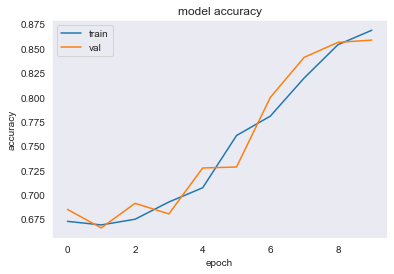

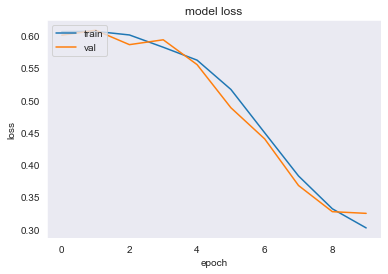

In [245]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

## Evaluation Metric: ROC-AUC Score
* Why ROC AUC Score?
    * I would like to use the average individual AUCs of each predicted column as an evaluation metric to validate the performance of the model.
    * ROC curve is an evaluation metric used to validate the performance for binary classification models.
    * It is a probability curve that plots the True Positive Rate against False Positive Rate at various threshold values 
    * It essentially separates the signal from the noise. 
    * AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
    * The higher the AUC Score, the better the performance of the model at distinguishing between the positive and negative classes here it is (0 or 1)

In [246]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

In [260]:
from sklearn.metrics import roc_auc_score
def get_avg_roc_auc_score(y_true,y_pred):
    train_df = pd.DataFrame(y_true,columns=['hate_speech','obscene','insulting'])
    pred_df = pd.DataFrame(y_pred,columns=['hate_speech','obscene','insulting'])
    
    hate_speech_auc = roc_auc_score(train_df.hate_speech, pred_df.hate_speech)
    obscene_auc = roc_auc_score(train_df.obscene, pred_df.obscene)
    insulting_auc = roc_auc_score(train_df.insulting, pred_df.insulting)
    avg_auc_score = (hate_speech_auc+insulting_auc+insulting_auc)/3
    return avg_auc_score

In [262]:
print('Trainig Score:: {}'.format(get_avg_roc_auc_score(y_train,y_train_preds)))
print('Testing Score:: {}'.format(get_avg_roc_auc_score(y_test,y_test_preds)))

Trainig Score:: 0.9245959018020636
Testing Score:: 0.9208283288309701


## Model summary:
> * Trainig Score:: 0.9245959018020636
> * Testing Score:: 0.9208283288309701

## Further Improvements:
* Task Specific embeddings can be used instead of using Glove
* Maxpooling can be performed after the Embedding Layer
* 1 Dimensional CNN Layer can be added after the emmedding layer for feature extraction
* Features such as no_of_words, no_of_unique_words, comments_length, no_of_beep_words can be tried out to see they improve the model performance.